<a href="https://colab.research.google.com/github/code4tomorrow/machine-learning/blob/main/1_beginner/chapter8/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Machine Learning: Polynomial Regression**

This data set is about the relationship between the numerical value 'level', which represents the position of an employee in a company, and 'salary', which is self-explanatory.

### **Import Data and Libraries**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
df = pd.read_csv("Position_Salaries.csv")

Let's take a look at what the dataframe really looks like:

In [ ]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


### **Feature Extraction**

The dataframe contains an extra column that we're not going to be using, so we'll go ahead and remove it from the dataframe.

In [ ]:
df = df[["Level","Salary"]]

### **Train-Test Split**

As always, let's create a mask, then filter the data into train and test sets.

In [ ]:
msk = np.random.rand(len(df))<0.8
train = df[msk]
test = df[~msk]

You'll be more familiar with this soon, but since the data set itself is really small - only 16 rows - we'll use the entire data set for plotting.

In [ ]:
level = np.asanyarray(df[["Level"]])
salary = np.asanyarray(df[["Salary"]])

Now, we split the train and test sets into the particular features, and then scatter it to see what shape it conveys.

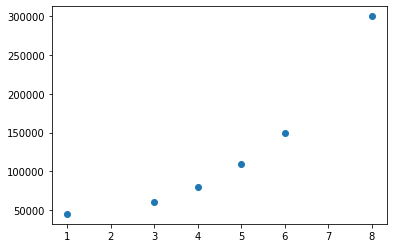

In [ ]:
train_level = np.asanyarray(train[["Level"]])
train_salary = np.asanyarray(train[["Salary"]])
test_level = np.asanyarray(test[["Level"]])
test_salary = np.asanyarray(test[["Salary"]])
plt.scatter(train_level,train_salary)

## **Modelling**

This will be the only new step. Here, we create a combination of polynomial features out of the features. In this example, we'll use a quadratic polynomial, so that's where the 'degree = 2' means. In a few minutes, you are going to try to implement it with other-degree polynomials. 

*Hint: 4,5 and 6-degree polynomials would be a good model.*

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
train_level_poly = poly.fit_transform(train_level)

Now, we create a linear regression object, and fit it to the data set.

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(train_level_poly,train_salary)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Since we have to evaluate and plot the test data for level and salary, we have to perform *fit_transform* on *test_level* and use it to check the prediction.

In [ ]:
test_level_poly = poly.fit_transform(test_level)
predicted_salary = regr.predict(test_level_poly)
level_poly = poly.fit_transform(level)

## **Evaluation**

Now, we plot and scatter the model and entire data.

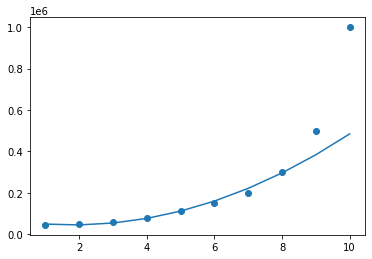

In [ ]:
plt.scatter(level, salary)
plt.plot(level, regr.predict(level_poly))

Finally, we apply R^2 Score, Mean Absolute Error and Mean Squared Error. 

In [ ]:
from sklearn.metrics import r2_score
print("R^2 Score: ",r2_score(test_salary,predicted_salary))
print(np.mean(np.absolute(test_salary-predicted_salary)))
print(np.mean((test_salary-predicted_salary)**2))

R^2 Score:  0.46907824950860477
164626.67441224708
69932349322.53847


You'll see that the accuracy is not great. A quadratic model is not a great idea for this. Instead, now, it's your turn! Try it out for 4th, 5th and 6th degree polynomials, and you'll see they're a lot more accurate. 

## **Modelling**

Try making polynomial features out of train_level_poly. Try 4th, 5th and 6th degrees.

Now fit and evaluate the model. 